<a href="https://colab.research.google.com/github/ketoprakcode09/Proyek-1-Health-Insurance/blob/main/PacMann_Project_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

1. Rata-rata Umur:
   Mean: 39.21 tahun
   Median: 39.00 tahun
   Std Dev: 14.05 tahun

2. Rata-rata BMI Perokok:
   Perokok: 30.71
   Non-perokok: 30.65

3. Variansi Tagihan Kesehatan:
   Variansi Perokok: $133,207,311.21
   Variansi Non-perokok: $35,925,420.50
   Ratio: 3.71x

4. Rata-rata Umur Perokok berdasarkan Gender:
   Laki-laki perokok: 38.45 tahun
   Perempuan perokok: 38.61 tahun
   Selisih: 0.16 tahun

5. Rata-rata Tagihan Kesehatan:
   Perokok: $32,050.23
   Non-perokok: $8,434.27
   Selisih: $23,615.96
   Persentase lebih tinggi: 280.00% unskilled

6. Tagihan untuk BMI > 25 (Overweight):
   Perokok dengan BMI>25: $35,116.91
   Non-perokok dengan BMI>25: $8,629.59
   Selisih: $26,487.32

7. Perbandingan BMI:
   BMI Perokok: 30.71
   BMI Non-perokok: 30.65
   Selisih: 0.06

1. Tagihan Rata-rata berdasarkan Gender:
                mean      median  count
sex                                    
female  12569.578844  9412.96250    662
male    13956.7

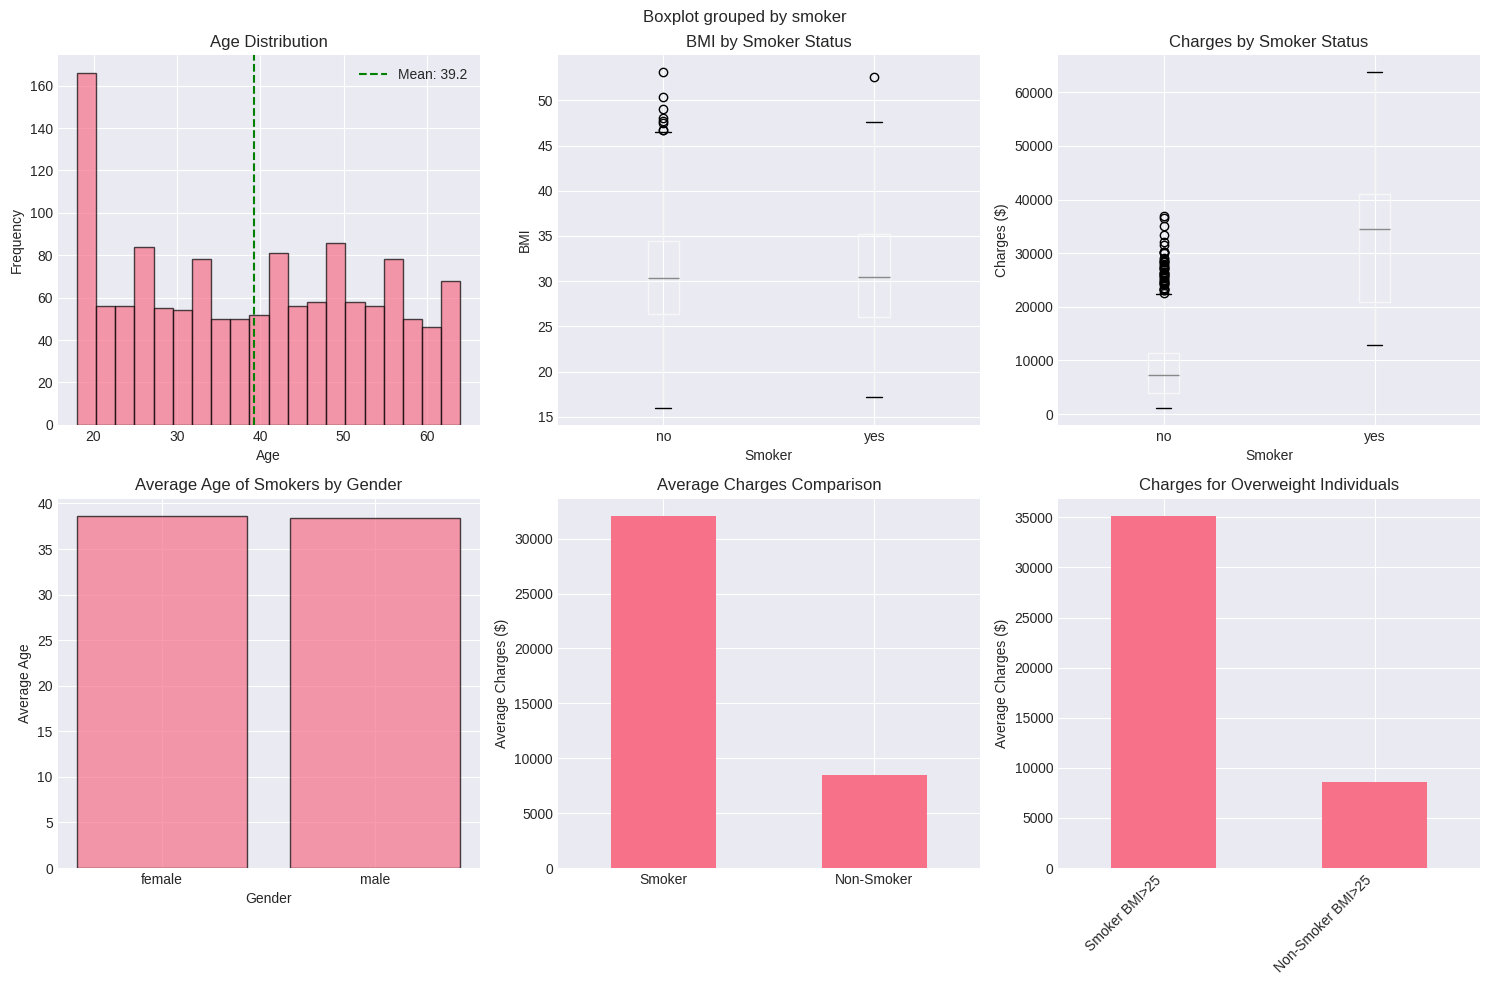

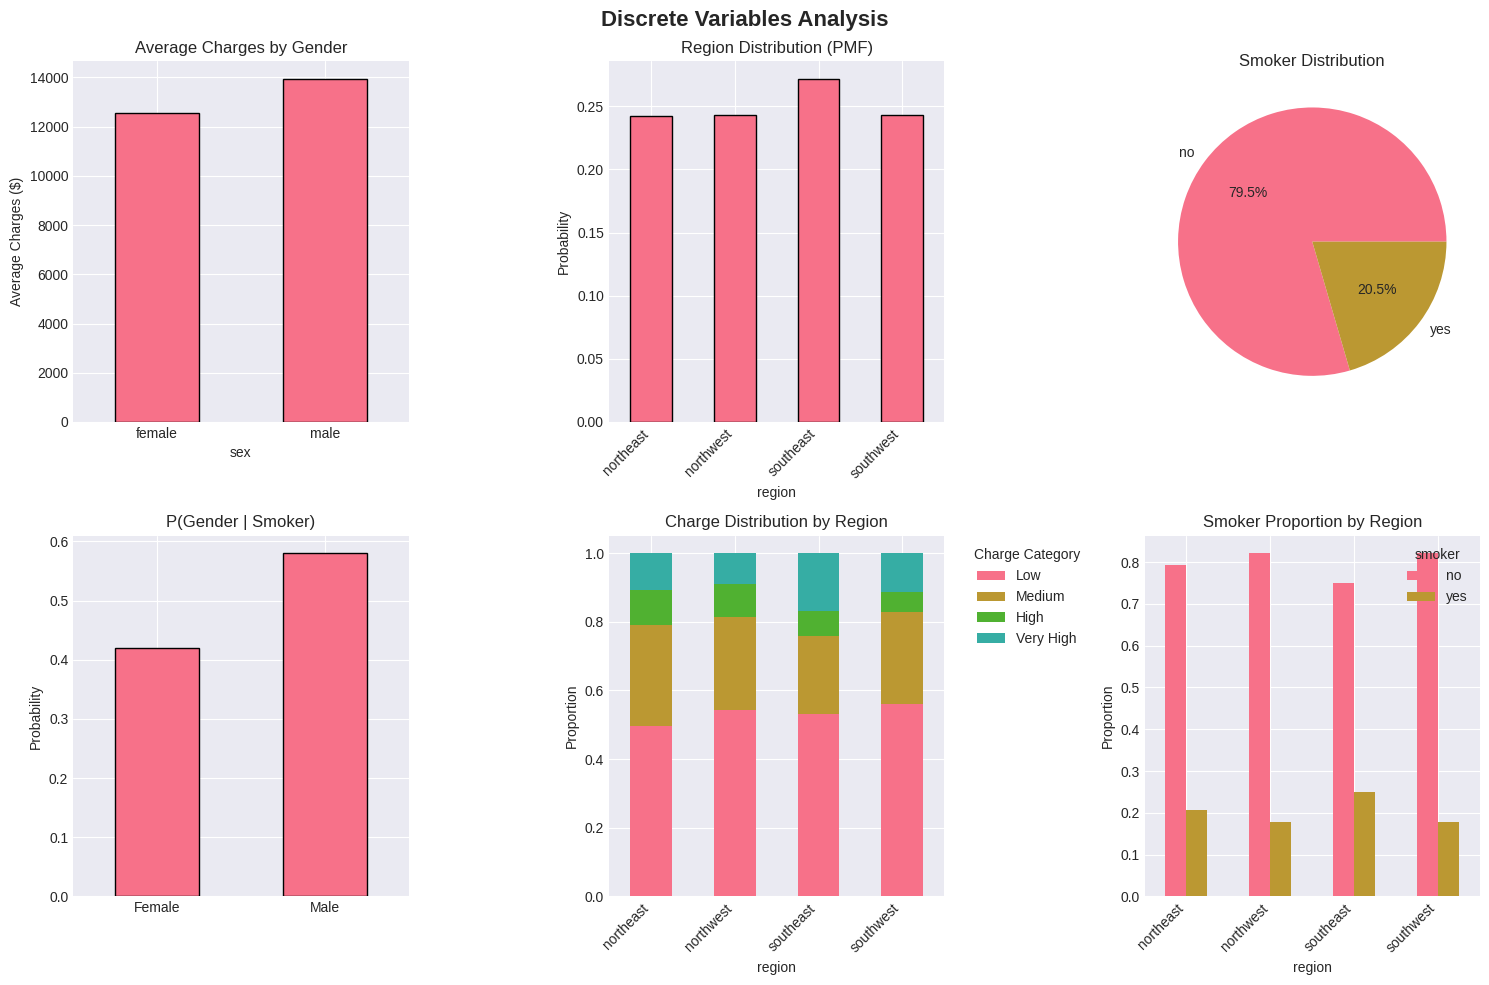

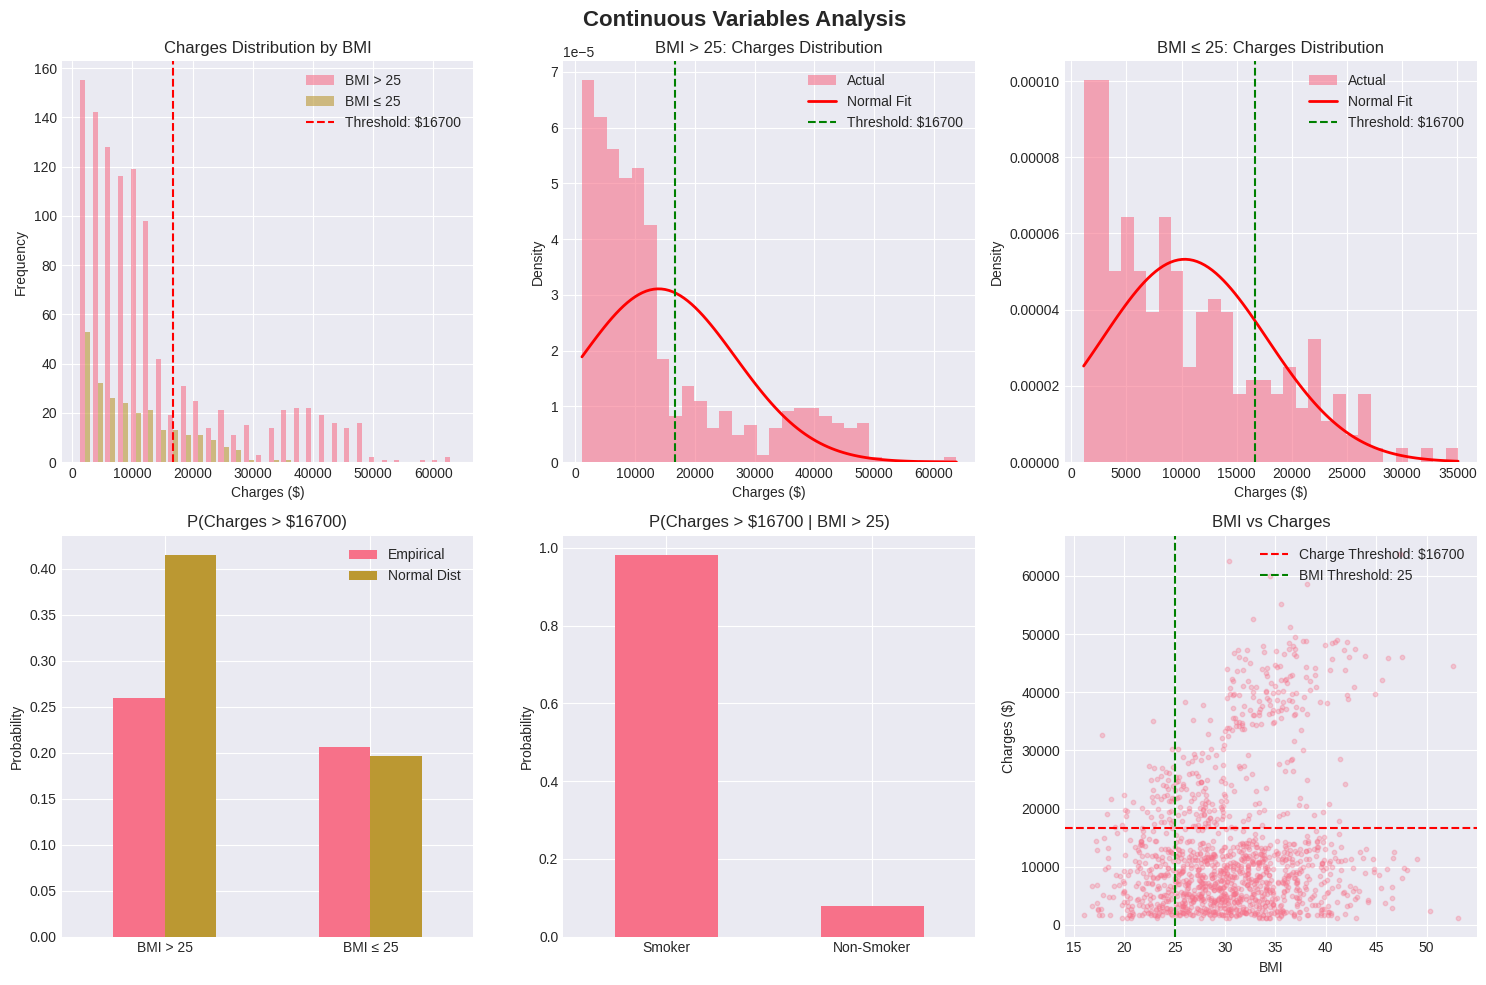

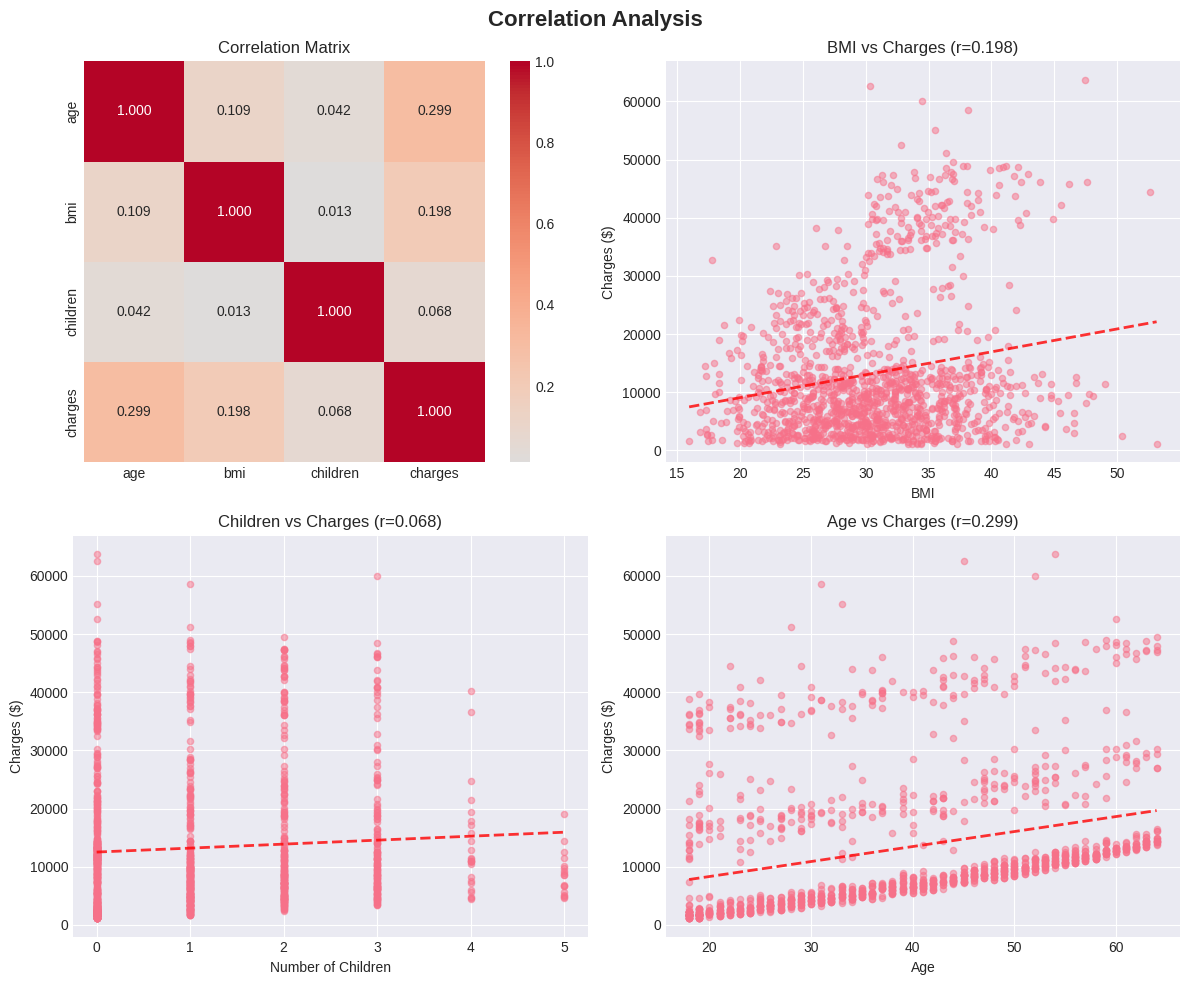

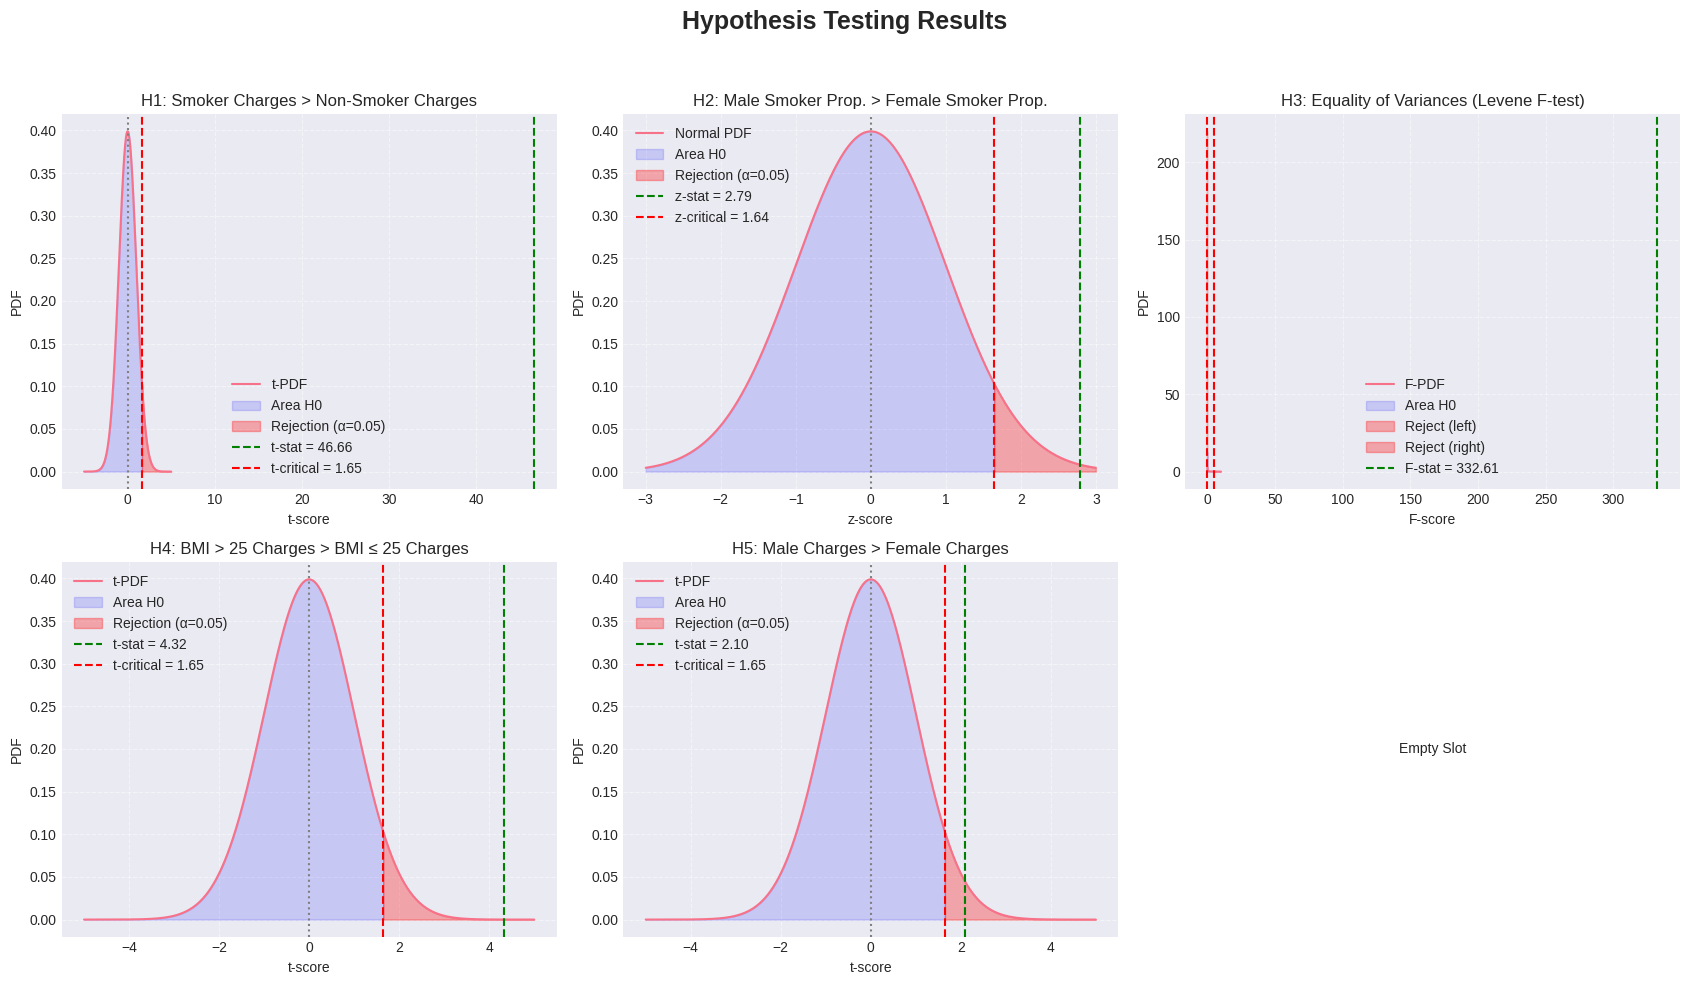

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2_contingency, pearsonr, spearmanr, f
import warnings
from google.colab import drive
from google.colab import files
import requests
warnings.filterwarnings('ignore')

# Mengambil Data

drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/Probabilitas-PacMann/insurance.csv'
data = pd.read_csv(file_path, na_filter=True)

# DESCRIPTIVE STATISTICS ANALYSIS
# Berapa rata-rata umur pada data tersebut?
print("\n1. Rata-rata Umur:")
mean_age = data['age'].mean()
median_age = data['age'].median()
std_age = data['age'].std()
print(f"   Mean: {mean_age:.2f} tahun")
print(f"   Median: {median_age:.2f} tahun")
print(f"   Std Dev: {std_age:.2f} tahun")

# Berapa rata-rata BMI dari yang merokok?
print("\n2. Rata-rata BMI Perokok:")
bmi_smoker = data[data['smoker'] == 'yes']['bmi'].mean()
bmi_non_smoker = data[data['smoker'] == 'no']['bmi'].mean()
print(f"   Perokok: {bmi_smoker:.2f}")
print(f"   Non-perokok: {bmi_non_smoker:.2f}")

# Apakah variansi tagihan kesehatan perokok dan non-perokok sama?
print("\n3. Variansi Tagihan Kesehatan:")
var_smoker = data[data['smoker'] == 'yes']['charges'].var()
var_non_smoker = data[data['smoker'] == 'no']['charges'].var()
print(f"   Variansi Perokok: ${var_smoker:,.2f}")
print(f"   Variansi Non-perokok: ${var_non_smoker:,.2f}")
print(f"   Ratio: {var_smoker/var_non_smoker:.2f}x")

# Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
print("\n4. Rata-rata Umur Perokok berdasarkan Gender:")
smokers = data[data['smoker'] == 'yes']
age_male_smoker = smokers[smokers['sex'] == 'male']['age'].mean()
age_female_smoker = smokers[smokers['sex'] == 'female']['age'].mean()
print(f"   Laki-laki perokok: {age_male_smoker:.2f} tahun")
print(f"   Perempuan perokok: {age_female_smoker:.2f} tahun")
print(f"   Selisih: {abs(age_male_smoker - age_female_smoker):.2f} tahun")

# Mana yang lebih tinggi, rata-rata tagihan perokok atau non-perokok?
print("\n5. Rata-rata Tagihan Kesehatan:")
charges_smoker = data[data['smoker'] == 'yes']['charges'].mean()
charges_non_smoker = data[data['smoker'] == 'no']['charges'].mean()
print(f"   Perokok: ${charges_smoker:,.2f}")
print(f"   Non-perokok: ${charges_non_smoker:,.2f}")
print(f"   Selisih: ${charges_smoker - charges_non_smoker:,.2f}")
print(f"   Persentase lebih tinggi: {((charges_smoker/charges_non_smoker - 1) * 100):.2f}% unskilled")

# Tagihan perokok BMI>25 vs non-perokok BMI>25
print("\n6. Tagihan untuk BMI > 25 (Overweight):")
overweight_smoker = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]['charges'].mean()
overweight_non_smoker = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]['charges'].mean()
print(f"   Perokok dengan BMI>25: ${overweight_smoker:,.2f}")
print(f"   Non-perokok dengan BMI>25: ${overweight_non_smoker:,.2f}")
print(f"   Selisih: ${overweight_smoker - overweight_non_smoker:,.2f}")

# BMI perokok vs non-perokok
print("\n7. Perbandingan BMI:")
print(f"   BMI Perokok: {bmi_smoker:.2f}")
print(f"   BMI Non-perokok: {bmi_non_smoker:.2f}")
print(f"   Selisih: {abs(bmi_smoker - bmi_non_smoker):.2f}")

# ANALISA VARIABLE DISKRIT
# Gender mana yang memiliki tagihan tertinggi?
print("\n1. Tagihan Rata-rata berdasarkan Gender:")
charges_by_sex = data.groupby('sex')['charges'].agg(['mean', 'median', 'count'])
print(charges_by_sex)
highest_gender = charges_by_sex['mean'].idxmax()
print(f"   → Gender dengan tagihan tertinggi: {highest_gender}")

# Distribusi peluang tagihan di tiap region
print("\n2. Distribusi Peluang di Tiap Region:")
region_dist = data['region'].value_counts(normalize=True).sort_index()
print("   Probability Mass Function (PMF):")
for region, prob in region_dist.items():
    print(f"   P(Region = {region}) = {prob:.4f} ({prob*100:.2f}%)")

# Apakah setiap region memiliki proporsi yang sama?
print("\n3. Uji Proporsi Region:")
region_counts = data['region'].value_counts()
expected_count = len(data) / len(region_counts)
chi2_stat = ((region_counts - expected_count)**2 / expected_count).sum()
p_value = 1 - stats.chi2.cdf(chi2_stat, df=len(region_counts)-1)
print(f"   Chi-square statistic: {chi2_stat:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   → Kesimpulan: Proporsi {'TIDAK' if p_value < 0.05 else ''} sama (α=0.05)")

# Proporsi perokok vs non-perokok
print("\n4. Proporsi Perokok vs Non-Perokok:")
smoker_prop = data['smoker'].value_counts(normalize=True)
print(f"   P(Smoker = yes) = {smoker_prop['yes']:.4f} ({smoker_prop['yes']*100:.2f}%)")
print(f"   P(Smoker = no) = {smoker_prop['no']:.4f} ({smoker_prop['no']*100:.2f}%)")
print(f"   → Proporsi {'Perokok' if smoker_prop['yes'] > smoker_prop['no'] else 'Non-perokok'} lebih tinggi")

# P(Female | Smoker) - Conditional Probability
print("\n5. Peluang Perempuan jika Diketahui Perokok:")
smokers_only = data[data['smoker'] == 'yes']
p_female_given_smoker = (smokers_only['sex'] == 'female').mean()
print(f"   P(Female | Smoker) = {p_female_given_smoker:.4f} ({p_female_given_smoker*100:.2f}%)")

# P(Male | Smoker)
print("\n6. Peluang Laki-laki jika Diketahui Perokok:")
p_male_given_smoker = (smokers_only['sex'] == 'male').mean()
print(f"   P(Male | Smoker) = {p_male_given_smoker:.4f} ({p_male_given_smoker*100:.2f}%)")

# Distribusi tagihan per region
print("\n7. Distribusi Tagihan per Region:")
# Kategorisasi tagihan
data['charge_category'] = pd.cut(data['charges'],
                                  bins=[0, 10000, 20000, 30000, float('inf')],
                                  labels=['Low', 'Medium', 'High', 'Very High'])

region_charge_dist = pd.crosstab(data['region'], data['charge_category'], normalize='index')
print(region_charge_dist)

# ANALISA VARIABLE KONTINU
# Perbandingan peluang P(Charges > 16700 | BMI > 25) vs P(Charges > 16700 | BMI < 25)
print("\n1. Peluang Tagihan > $16,700:")
threshold = 16700

# Metode 1: Empirical Probability (dari data)
print("\n   Metode Empirical (dari data):")
high_bmi = data[data['bmi'] > 25]
low_bmi = data[data['bmi'] <= 25]

p_high_charge_high_bmi = (high_bmi['charges'] > threshold).mean()
p_high_charge_low_bmi = (low_bmi['charges'] > threshold).mean()

print(f"   P(Charges > {threshold} | BMI > 25) = {p_high_charge_high_bmi:.4f}")
print(f"   P(Charges > {threshold} | BMI \u2264 25) = {p_high_charge_low_bmi:.4f}")
print(f"   \u2192 {'BMI > 25' if p_high_charge_high_bmi > p_high_charge_low_bmi else 'BMI \u2264 25'} lebih mungkin memiliki tagihan tinggi")

# Metode 2: Assuming Normal Distribution
print("\n   Metode Asumsi Distribusi Normal:")
mu_high_bmi = high_bmi['charges'].mean()
sigma_high_bmi = high_bmi['charges'].std()
mu_low_bmi = low_bmi['charges'].mean()
sigma_low_bmi = low_bmi['charges'].std()

z_high_bmi = (threshold - mu_high_bmi) / sigma_high_bmi
z_low_bmi = (threshold - mu_low_bmi) / sigma_low_bmi

p_norm_high_bmi = 1 - norm.cdf(z_high_bmi)
p_norm_low_bmi = 1 - norm.cdf(z_low_bmi)

print(f"   BMI > 25: \u00b5=${mu_high_bmi:,.2f}, \u03c3=${sigma_high_bmi:,.2f}")
print(f"   P(Charges > {threshold} | BMI > 25) = {p_norm_high_bmi:.4f}")
print(f"   BMI \u2264 25: \u00b5=${mu_low_bmi:,.2f}, \u03c3=${sigma_low_bmi:,.2f}")
print(f"   P(Charges > {threshold} | BMI \u2264 25) = {p_norm_low_bmi:.4f}")

# Perbandingan perokok vs non-perokok dengan BMI > 25
print("\n2. Peluang Tagihan > $16,700 untuk BMI > 25:")
overweight_smoker_data = data[(data['bmi'] > 25) & (data['smoker'] == 'yes')]
overweight_nonsmoker_data = data[(data['bmi'] > 25) & (data['smoker'] == 'no')]

p_high_charge_smoker = (overweight_smoker_data['charges'] > threshold).mean()
p_high_charge_nonsmoker = (overweight_nonsmoker_data['charges'] > threshold).mean()

print(f"   P(Charges > {threshold} | BMI > 25, Smoker) = {p_high_charge_smoker:.4f}")
print(f"   P(Charges > {threshold} | BMI > 25, Non-smoker) = {p_high_charge_nonsmoker:.4f}")
print(f"   \u2192 {'Perokok' if p_high_charge_smoker > p_high_charge_nonsmoker else 'Non-perokok'} dengan BMI > 25 lebih mungkin memiliki tagihan tinggi")
print(f"   Odds Ratio: {p_high_charge_smoker / p_high_charge_nonsmoker:.2f}x")

# ANALISA KORELASI
# Korelasi antara charges dengan variable numerik
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = data[numeric_cols].corr()

print("\n1. Correlation Matrix:")
print(correlation_matrix)

# Fokus pada korelasi dengan charges
print("\n2. Korelasi dengan Charges:")
charges_corr = correlation_matrix['charges'].sort_values(ascending=False)
print(charges_corr)

# Korelasi spesifik: BMI vs Charges
print("\n3. Korelasi BMI vs Charges:")
corr_bmi_charges, p_value_bmi = pearsonr(data['bmi'], data['charges'])
print(f"   Pearson Correlation: {corr_bmi_charges:.4f}")
print(f"   P-value: {p_value_bmi:.4f}")
print(f"   Interpretasi: Korelasi {'positif' if corr_bmi_charges > 0 else 'negatif'} {'lemah' if abs(corr_bmi_charges) < 0.3 else 'sedang' if abs(corr_bmi_charges) < 0.7 else 'kuat'}")
print(f"   Signifikan: {'Ya' if p_value_bmi < 0.05 else 'Tidak'} (\u03b1=0.05)")

# Korelasi spesifik: Children vs Charges
print("\n4. Korelasi Jumlah Anak vs Charges:")
corr_children_charges, p_value_children = pearsonr(data['children'], data['charges'])
print(f"   Pearson Correlation: {corr_children_charges:.4f}")
print(f"   P-value: {p_value_children:.4f}")
print(f"   Interpretasi: Korelasi {'positif' if corr_children_charges > 0 else 'negatif'} {'lemah' if abs(corr_children_charges) < 0.3 else 'sedang' if abs(corr_children_charges) < 0.7 else 'kuat'}")
print(f"   Signifikan: {'Ya' if p_value_children < 0.05 else 'Tidak'} (\u03b1=0.05)")

# Korelasi Age vs Charges
print("\n5. Korelasi Age vs Charges:")
corr_age_charges, p_value_age = pearsonr(data['age'], data['charges'])
print(f"   Pearson Correlation: {corr_age_charges:.4f}")
print(f"   P-value: {p_value_age:.4f}")
print(f"   Interpretasi: Korelasi {'positif' if corr_age_charges > 0 else 'negatif'} {'lemah' if abs(corr_age_charges) < 0.3 else 'sedang' if abs(corr_age_charges) < 0.7 else 'kuat'}")
print(f"   Signifikan: {'Ya' if p_value_age < 0.05 else 'Tidak'} (\u03b1=0.05)")

# PENGUJIAN HIPOTESIS
# Hipotesis 1: Tagihan perokok > tagihan non-perokok
print("\n1. Hipotesis: Tagihan perokok lebih tinggi dari non-perokok")
print("   H0: \u00b5_smoker \u2264 \u00b5_non-smoker")
print("   H1: \u00b5_smoker > \u00b5_non-smoker")
print("   Test: Independent Two-Sample t-test (one-tailed)")

smoker_charges = data[data['smoker'] == 'yes']['charges']
non_smoker_charges = data[data['smoker'] == 'no']['charges']

t_stat1, p_value1_two = stats.ttest_ind(smoker_charges, non_smoker_charges) # Gunakan t-test
p_value1 = p_value1_two / 2  # one-tailed

print(f"\n   Sample Statistics:")
print(f"   - Smoker: n={len(smoker_charges)}, \u00b5=${smoker_charges.mean():,.2f}, \u03c3=${smoker_charges.std():,.2f}")
print(f"   - Non-smoker: n={len(non_smoker_charges)}, \u00b5=${non_smoker_charges.mean():,.2f}, \u03c3=${non_smoker_charges.std():,.2f}")
print(f"\n   Test Results:")
print(f"   - t-statistic: {t_stat1:.4f}")
print(f"   - p-value (one-tailed): {p_value1:.4f}")
print(f"   - Significance level (\u03b1): 0.05")
print(f"\n   Kesimpulan: {'TOLAK H0' if (p_value1 < 0.05 and t_stat1 > 0) else 'GAGAL TOLAK H0'}")
if p_value1 < 0.05 and t_stat1 > 0:
    print(f"   \u2192 Ada bukti statistik yang cukup bahwa tagihan perokok lebih tinggi")
else:
    print(f"   \u2192 Tidak ada bukti statistik yang cukup bahwa tagihan perokok lebih tinggi")

# Hipotesis 2: Proporsi perokok laki-laki > proporsi perokok perempuan
print("\n\n2. Hipotesis: Proporsi perokok laki-laki lebih besar dari perempuan")
print("   H0: p_male \u2264 p_female")
print("   H1: p_male > p_female")
print("   Test: Two-Proportion z-test (one-tailed)")

male_data = data[data['sex'] == 'male']
female_data = data[data['sex'] == 'female']

n_male = len(male_data)
n_female = len(female_data)
x_male = (male_data['smoker'] == 'yes').sum()
x_female = (female_data['smoker'] == 'yes').sum()
p_male = x_male / n_male
p_female = x_female / n_female

p_pooled = (x_male + x_female) / (n_male + n_female)
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_male + 1/n_female))
z_stat2 = (p_male - p_female) / se_pooled
p_value2 = 1 - norm.cdf(z_stat2)  # one-tailed

print(f"\n   Sample Statistics:")
print(f"   - Male: n={n_male}, smokers={x_male}, p={p_male:.4f} ({p_male*100:.2f}%)")
print(f"   - Female: n={n_female}, smokers={x_female}, p={p_female:.4f} ({p_female*100:.2f}%)")
print(f"\n   Test Results:")
print(f"   - z-statistic: {z_stat2:.4f}")
print(f"   - p-value (one-tailed): {p_value2:.4f}")
print(f"   - Significance level (\u03b1): 0.05")
print(f"\n   Kesimpulan: {'TOLAK H0' if p_value2 < 0.05 else 'GAGAL TOLAK H0'}")
if p_value2 < 0.05:
    print(f"   \u2192 Ada bukti statistik bahwa proporsi perokok laki-laki lebih tinggi")
else:
    print(f"   \u2192 Tidak ada bukti statistik yang cukup bahwa proporsi perokok laki-laki lebih tinggi")

# Hipotesis 3: Variansi tagihan perokok = variansi tagihan non-perokok
print("\n\n3. Hipotesis: Variansi tagihan perokok sama dengan non-perokok")
print("   H0: \u03c3\u00b2_smoker = \u03c3\u00b2_non-smoker")
print("   H1: \u03c3\u00b2_smoker \u2260 \u03c3\u00b2_non-smoker")
print("   Test: Levene's Test (two-tailed)")

stat3, p_value3 = stats.levene(smoker_charges, non_smoker_charges)

print(f"\n   Sample Statistics:")
print(f"   - Smoker: \u03c3\u00b2=${smoker_charges.var():,.2f}")
print(f"   - Non-smoker: \u03c3\u00b2=${non_smoker_charges.var():,.2f}")
print(f"\n   Test Results:")
print(f"   - Levene statistic: {stat3:.4f}")
print(f"   - p-value (two-tailed): {p_value3:.4f}")
print(f"   - Significance level (\u03b1): 0.05")
print(f"\n   Kesimpulan: {'TOLAK H0' if p_value3 < 0.05 else 'GAGAL TOLAK H0'}")
if p_value3 < 0.05:
    print(f"   \u2192 Variansi tagihan perokok dan non-perokok BERBEDA secara signifikan")
else:
    print(f"   \u2192 Tidak ada bukti bahwa variansi berbeda (variansi homogen)")

# Hipotesis 4: Tagihan BMI>25 > tagihan BMI\u226425
print("\n\n4. Hipotesis: Tagihan BMI>25 lebih tinggi dari BMI\u226425")
print("   H0: \u00b5_high_bmi \u2264 \u00b5_low_bmi")
print("   H1: \u00b5_high_bmi > \u00b5_low_bmi")
print("   Test: Independent Two-Sample t-test (one-tailed)")

high_bmi_charges = data[data['bmi'] > 25]['charges']
low_bmi_charges = data[data['bmi'] <= 25]['charges']

t_stat4, p_value4_two = stats.ttest_ind(high_bmi_charges, low_bmi_charges)
p_value4 = p_value4_two / 2  # one-tailed

print(f"\n   Sample Statistics:")
print(f"   - BMI>25: n={len(high_bmi_charges)}, \u00b5=${high_bmi_charges.mean():,.2f}, \u03c3=${high_bmi_charges.std():,.2f}")
print(f"   - BMI\u226425: n={len(low_bmi_charges)}, \u00b5=${low_bmi_charges.mean():,.2f}, \u03c3=${low_bmi_charges.std():,.2f}")
print(f"\n   Test Results:")
print(f"   - t-statistic: {t_stat4:.4f}")
print(f"   - p-value (one-tailed): {p_value4:.4f}")
print(f"   - Significance level (\u03b1): 0.05")
print(f"\n   Kesimpulan: {'TOLAK H0' if (p_value4 < 0.05 and t_stat4 > 0) else 'GAGAL TOLAK H0'}")
if p_value4 < 0.05 and t_stat4 > 0:
    print(f"   \u2192 Ada bukti statistik bahwa tagihan BMI>25 lebih tinggi")
else:
    print(f"   \u2192 Tidak ada bukti statistik yang cukup bahwa tagihan BMI>25 lebih tinggi")

# Hipotesis 5: Tagihan laki-laki > tagihan perempuan
print("\n\n5. Hipotesis: Tagihan laki-laki lebih tinggi dari perempuan")
print("   H0: \u00b5_male \u2264 \u00b5_female")
print("   H1: \u00b5_male > \u00b5_female")
print("   Test: Independent Two-Sample t-test (one-tailed)")

male_charges = data[data['sex'] == 'male']['charges']
female_charges = data[data['sex'] == 'female']['charges']

t_stat5, p_value5_two = stats.ttest_ind(male_charges, female_charges)
p_value5 = p_value5_two / 2  # one-tailed

print(f"\n   Sample Statistics:")
print(f"   - Male: n={len(male_charges)}, \u00b5=${male_charges.mean():,.2f}, \u03c3=${male_charges.std():,.2f}")
print(f"   - Female: n={len(female_charges)}, \u00b5=${female_charges.mean():,.2f}, \u03c3=${female_charges.std():,.2f}")
print(f"\n   Test Results:")
print(f"   - t-statistic: {t_stat5:.4f}")
print(f"   - p-value (one-tailed): {p_value5:.4f}")
print(f"   - Significance level (\u03b1): 0.05")
print(f"\n   Kesimpulan: {'TOLAK H0' if (p_value5 < 0.05 and t_stat5 > 0) else 'GAGAL TOLAK H0'}")
if p_value5 < 0.05 and t_stat5 > 0:
    print(f"   \u2192 Ada bukti statistik bahwa tagihan laki-laki lebih tinggi")
else:
    print(f"   \u2192 Tidak ada bukti statistik yang cukup bahwa tagihan laki-laki lebih tinggi")


#---------------------------------------------------------
#VISUALISASI
#---------------------------------------------------------
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# DESCRIPTIVE STATISTICS ANALYSIS
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Descriptive Statistics Analysis', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(data['age'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(mean_age, color='green', linestyle='--', label=f'Mean: {mean_age:.1f}')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# BMI by smoker status
data.boxplot(column='bmi', by='smoker', ax=axes[0, 1])
axes[0, 1].set_title('BMI by Smoker Status')
axes[0, 1].set_xlabel('Smoker')
axes[0, 1].set_ylabel('BMI')

# Charges by smoker status
data.boxplot(column='charges', by='smoker', ax=axes[0, 2])
axes[0, 2].set_title('Charges by Smoker Status')
axes[0, 2].set_xlabel('Smoker')
axes[0, 2].set_ylabel('Charges ($)')

# Age by sex and smoker
smoker_age = data[data['smoker'] == 'yes'].groupby('sex')['age'].mean()
axes[1, 0].bar(smoker_age.index, smoker_age.values, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Average Age of Smokers by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Average Age')

# Charges comparison
comparison = pd.DataFrame({
    'Smoker': [charges_smoker],
    'Non-Smoker': [charges_non_smoker]
})
comparison.T.plot(kind='bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Average Charges Comparison')
axes[1, 1].set_ylabel('Average Charges ($)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

# BMI>25 charges comparison
comparison2 = pd.DataFrame({
    'Smoker BMI>25': [overweight_smoker],
    'Non-Smoker BMI>25': [overweight_non_smoker]
})
comparison2.T.plot(kind='bar', ax=axes[1, 2], legend=False)
axes[1, 2].set_title('Charges for Overweight Individuals')
axes[1, 2].set_ylabel('Average Charges ($)')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# ANALISA VARIABEL DISKRIT
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Discrete Variables Analysis', fontsize=16, fontweight='bold')

# Gender vs charges
data.groupby('sex')['charges'].mean().plot(kind='bar', ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_title('Average Charges by Gender')
axes[0, 0].set_ylabel('Average Charges ($)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Region distribution
region_dist.plot(kind='bar', ax=axes[0, 1], edgecolor='black')
axes[0, 1].set_title('Region Distribution (PMF)')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Smoker distribution
smoker_prop.plot(kind='pie', ax=axes[0, 2], autopct='%1.1f%%')
axes[0, 2].set_title('Smoker Distribution')
axes[0, 2].set_ylabel('')

# Conditional probability
cond_prob = pd.DataFrame({
    'Female': [p_female_given_smoker],
    'Male': [p_male_given_smoker]
})
cond_prob.T.plot(kind='bar', ax=axes[1, 0], legend=False, edgecolor='black')
axes[1, 0].set_title('P(Gender | Smoker)')
axes[1, 0].set_ylabel('Probability')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Region vs charge category
region_charge_dist.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Charge Distribution by Region')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].legend(title='Charge Category', bbox_to_anchor=(1.05, 1))

# Smoker by region
smoker_region = pd.crosstab(data['region'], data['smoker'], normalize='index')
smoker_region.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Smoker Proportion by Region')
axes[1, 2].set_ylabel('Proportion')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# ANALISA VARIABEL KONTINU
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Continuous Variables Analysis', fontsize=16, fontweight='bold')

# Charges distribution by BMI category
axes[0, 0].hist([high_bmi['charges'], low_bmi['charges']],
                bins=30, label=['BMI > 25', 'BMI \u2264 25'], alpha=0.6)
axes[0, 0].axvline(threshold, color='red', linestyle='--', label=f'Threshold: ${threshold}')
axes[0, 0].set_title('Charges Distribution by BMI')
axes[0, 0].set_xlabel('Charges ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Normal distribution overlay for BMI > 25
x_range = np.linspace(high_bmi['charges'].min(), high_bmi['charges'].max(), 100)
axes[0, 1].hist(high_bmi['charges'], bins=30, density=True, alpha=0.6, label='Actual')
axes[0, 1].plot(x_range, norm.pdf(x_range, mu_high_bmi, sigma_high_bmi),
                'r-', linewidth=2, label='Normal Fit')
axes[0, 1].axvline(threshold, color='green', linestyle='--', label=f'Threshold: ${threshold}')
axes[0, 1].set_title('BMI > 25: Charges Distribution')
axes[0, 1].set_xlabel('Charges ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()

# Normal distribution overlay for BMI <= 25
x_range2 = np.linspace(low_bmi['charges'].min(), low_bmi['charges'].max(), 100)
axes[0, 2].hist(low_bmi['charges'], bins=30, density=True, alpha=0.6, label='Actual')
axes[0, 2].plot(x_range2, norm.pdf(x_range2, mu_low_bmi, sigma_low_bmi),
                'r-', linewidth=2, label='Normal Fit')
axes[0, 2].axvline(threshold, color='green', linestyle='--', label=f'Threshold: ${threshold}')
axes[0, 2].set_title('BMI \u2264 25: Charges Distribution')
axes[0, 2].set_xlabel('Charges ($)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()

# Probability comparison
prob_comparison = pd.DataFrame({
    'Empirical': [p_high_charge_high_bmi, p_high_charge_low_bmi],
    'Normal Dist': [p_norm_high_bmi, p_norm_low_bmi]
}, index=['BMI > 25', 'BMI \u2264 25'])
prob_comparison.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title(f'P(Charges > ${threshold})')
axes[1, 0].set_ylabel('Probability')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].legend()

# Smoker vs Non-smoker (BMI > 25)
prob_smoker_comp = pd.DataFrame({
    'Probability': [p_high_charge_smoker, p_high_charge_nonsmoker]
}, index=['Smoker', 'Non-Smoker'])
prob_smoker_comp.plot(kind='bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title(f'P(Charges > ${threshold} | BMI > 25)')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

# BMI vs Charges scatter
axes[1, 2].scatter(data['bmi'], data['charges'], alpha=0.3, s=10)
axes[1, 2].axhline(threshold, color='red', linestyle='--', label=f'Charge Threshold: ${threshold}')
axes[1, 2].axvline(25, color='green', linestyle='--', label='BMI Threshold: 25')
axes[1, 2].set_title('BMI vs Charges')
axes[1, 2].set_xlabel('BMI')
axes[1, 2].set_ylabel('Charges ($)')
axes[1, 2].legend()

plt.tight_layout()

# ANALISIS KORELASI
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Correlation Analysis', fontsize=16, fontweight='bold')

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')

# BMI vs Charges
axes[0, 1].scatter(data['bmi'], data['charges'], alpha=0.5, s=20)
axes[0, 1].set_title(f'BMI vs Charges (r={corr_bmi_charges:.3f})')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges ($)')
# Add regression line
z = np.polyfit(data['bmi'], data['charges'], 1)
p = np.poly1d(z)
axes[0, 1].plot(data['bmi'].sort_values(), p(data['bmi'].sort_values()),
                "r--", alpha=0.8, linewidth=2)

# Children vs Charges
axes[1, 0].scatter(data['children'], data['charges'], alpha=0.5, s=20)
axes[1, 0].set_title(f'Children vs Charges (r={corr_children_charges:.3f})')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Charges ($)')
z2 = np.polyfit(data['children'], data['charges'], 1)
p2 = np.poly1d(z2)
axes[1, 0].plot(data['children'].sort_values().unique(),
                p2(data['children'].sort_values().unique()),
                "r--", alpha=0.8, linewidth=2)

# Age vs Charges
axes[1, 1].scatter(data['age'], data['charges'], alpha=0.5, s=20)
axes[1, 1].set_title(f'Age vs Charges (r={corr_age_charges:.3f})')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Charges ($)')
z3 = np.polyfit(data['age'], data['charges'], 1)
p3 = np.poly1d(z3)
axes[1, 1].plot(data['age'].sort_values(), p3(data['age'].sort_values()),
                "r--", alpha=0.8, linewidth=2)

plt.tight_layout()

#UJI HIPOTESIS
def plot_t_test(ax, t_stat, df, alpha, title):
    x = np.linspace(-5, 5, 500)
    pdf = t.pdf(x, df=df)

    ax.plot(x, pdf, label='t-PDF')

    # Critical value (right-tailed)
    t_crit = t.ppf(1 - alpha, df=df)

    x_h0 = np.linspace(x.min(), t_crit, 400)
    ax.fill_between(x_h0, t.pdf(x_h0, df=df), color='blue', alpha=0.15, label='Area H0')

    x_reject = np.linspace(t_crit, x.max(), 400)
    ax.fill_between(x_reject, t.pdf(x_reject, df=df), color='red', alpha=0.3,
                    label=f'Rejection (\u03b1={alpha})')

    # Lines
    ax.axvline(0, color='gray', linestyle=':')
    ax.axvline(t_stat, color='green', linestyle='--', label=f't-stat = {t_stat:.2f}')
    ax.axvline(t_crit, color='red', linestyle='--', label=f't-critical = {t_crit:.2f}')

    ax.set_title(title)
    ax.set_xlabel('t-score')
    ax.set_ylabel('PDF')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

def plot_z_test(ax, z_stat, alpha, title):
    x = np.linspace(-3, 3, 500)
    pdf = norm.pdf(x)

    ax.plot(x, pdf, label='Normal PDF')

    # Critical value (right-tailed)
    z_crit = norm.ppf(1 - alpha)

    x_h0 = np.linspace(x.min(), z_crit, 400)
    ax.fill_between(x_h0, norm.pdf(x_h0), color='blue', alpha=0.15, label='Area H0')

    x_rej = np.linspace(z_crit, x.max(), 400)
    ax.fill_between(x_rej, norm.pdf(x_rej), color='red', alpha=0.3,
                    label=f'Rejection (\u03b1={alpha})')

    # Lines
    ax.axvline(0, color='gray', linestyle=':')
    ax.axvline(z_stat, color='green', linestyle='--', label=f'z-stat = {z_stat:.2f}')
    ax.axvline(z_crit, color='red', linestyle='--', label=f'z-critical = {z_crit:.2f}')

    ax.set_title(title)
    ax.set_xlabel('z-score')
    ax.set_ylabel('PDF')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)


def plot_f_test(ax, f_stat, df1, df2, alpha, title):
    x = np.linspace(0, 10, 500)
    pdf = f.pdf(x, df1, df2)

    ax.plot(x, pdf, label='F-PDF')

    # Two-tailed critical values
    f_lower = f.ppf(alpha / 2, df1, df2)
    f_upper = f.ppf(1 - alpha / 2, df1, df2)

    x_h0 = np.linspace(f_lower, f_upper, 400)
    ax.fill_between(x_h0, f.pdf(x_h0, df1, df2), color='blue', alpha=0.15, label='Area H0')

    x_low = np.linspace(0, f_lower, 300)
    ax.fill_between(x_low, f.pdf(x_low, df1, df2),
                    alpha=0.3, color='red', label='Reject (left)')

    x_up = np.linspace(f_upper, x.max(), 300)
    ax.fill_between(x_up, f.pdf(x_up, df1, df2),
                    alpha=0.3, color='red', label='Reject (right)')

    # Lines
    ax.axvline(f_stat, color='green', linestyle='--', label=f'F-stat = {f_stat:.2f}')
    ax.axvline(f_lower, color='red', linestyle='--')
    ax.axvline(f_upper, color='red', linestyle='--')

    ax.set_title(title)
    ax.set_xlabel('F-score')
    ax.set_ylabel('PDF')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

fig, axes = plt.subplots(2, 3, figsize=(17, 10))
fig.suptitle('Hypothesis Testing Results', fontsize=18, fontweight='bold')
alpha = 0.05

# Hypothesis 1
plot_t_test(
    axes[0, 0], t_stat1, df_h1, alpha,
    "H1: Smoker Charges > Non-Smoker Charges"
)

# Hypothesis 2
plot_z_test(
    axes[0, 1], z_stat2, alpha,
    "H2: Male Smoker Prop. > Female Smoker Prop."
)

# Hypothesis 3
plot_f_test(
    axes[0, 2], stat3, df1_h3, df2_h3, alpha,
    "H3: Equality of Variances (Levene F-test)"
)

# Hypothesis 4
plot_t_test(
    axes[1, 0], t_stat4, df_h4, alpha,
    "H4: BMI > 25 Charges > BMI \u2264 25 Charges"
)

# Hypothesis 5
plot_t_test(
    axes[1, 1], t_stat5, df_h5, alpha,
    "H5: Male Charges > Female Charges"
)

# Kosongkan slot terakhir (2\u00d73 = 6 subplot, Anda punya 5 hipotesis)
axes[1, 2].axis('off')
axes[1, 2].text(0.5, 0.5, 'Empty Slot', ha='center', va='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()